*This notebook is a part of a series, [Learning image manipulation in Python](#find), that covers the basics of working with images in [OpenCV](https://docs.opencv.org/), [Matplotlib](https://matplotlib.org/users/index.html) and [Numpy](https://numpy.org/doc/).*

# Blending images using Numpy operations

This notebooks covers the basics of blending images using simply operation in NumPy. These techniques can mimic many of the blending modes found in photo editing software like Adobe Photoshop. For more information about blending see [Blend modes](https://en.wikipedia.org/wiki/Blend_modes) article in Wikipedia.

In [87]:
from matplotlib import pyplot as plt
import cv2
import numpy as np

# Convenience function for displaying images
def showImage( image, title="" ):
    plt.imshow(image)
    plt.axis('off')
    plt.title(title)
    plt.show()

### Load images and normalize images

cvtColor converts images from BGR mode to RGB, this is important for displaying with matplotlib. We then divide the image values by 255 to normalize them to values betwen 0 and 1.

*Image of Space Shuttle Columbia lifting off from Kennedy Space Center, June, 20 1996. [Original on Flickr](https://www.flickr.com/photos/nasacommons/18841284111/in/photolist-uGWvm4-J2sHBo-v91jSL-a1mYCL-vGeWPH-qPWUYZ-9in9Gg-dG9QNC-qGaKS4-gNxTcA-5Nysom-soWftJ-5NyrN3-sp4KqB)*

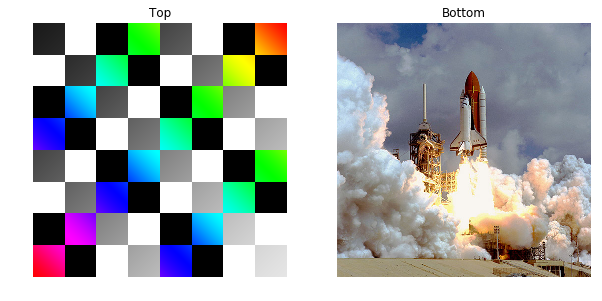

In [86]:
# Load and convert image to RGB in a single line
top = cv2.cvtColor(cv2.imread("images/checker.png"), cv2.COLOR_BGR2RGB) / 255.0
bottom = cv2.cvtColor(cv2.imread("images/shuttle.jpg"), cv2.COLOR_BGR2RGB) / 255.0

f, images = plt.subplots(1, 2, figsize=(10, 10))

images[0].imshow(top)
images[0].title.set_text('Top')
images[0].axis('off')
images[1].imshow(bottom)
images[1].title.set_text('Bottom')
images[1].axis('off')
plt.show()

## Darken (minimum)

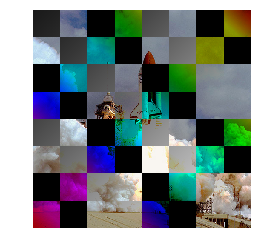

In [68]:
def darken(top, bottom):
    return np.minimum(top, bottom)

showImage(darken(top, bottom))

## Multiply

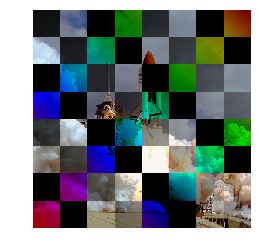

In [69]:
def multiply(top, bottom):
    return top * bottom

showImage(multiply(top, bottom))

## Color burn

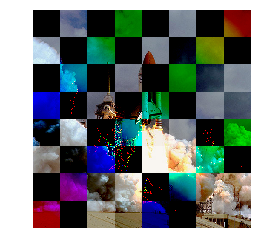

In [72]:
def colorBurn(top, bottom):
    result = 1 - ((1 - bottom) / (top + 0.0000001))  #Add a small fraction to avoid divide by zero
    return np.clip(result, 0, 1)

showImage(colorBurn(top, bottom))

## Linear burn

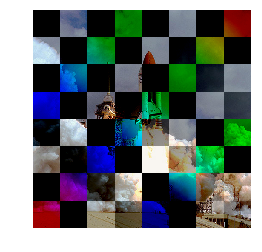

In [73]:
def linearBurn(top, bottom):
    result = top + bottom - 1
    return np.clip(result, 0, 1)

showImage(linearBurn(top, bottom))

## Lighten (max)

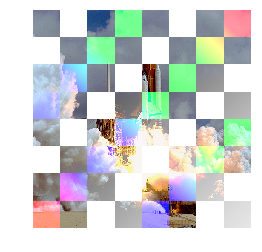

In [74]:
def lighten(top, bottom):
    return np.maximum(top, bottom)

showImage(lighten(top, bottom))

## Screen

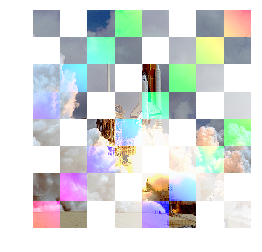

In [75]:
def screen(top, bottom):
    result = 1 - (1 - top) * (1 - bottom)
    return np.clip(result, 0, 1)

showImage(screen(top, bottom))

## Color dodge

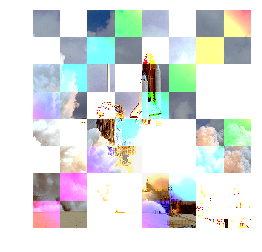

In [78]:
def colorDodge(top, bottom):
    result = bottom / (1.0000001 - top)  # Again small fraction prevents divide by zero
    return np.clip(result, 0, 1)

showImage(colorDodge(top, bottom))

## Add (linear dodge)

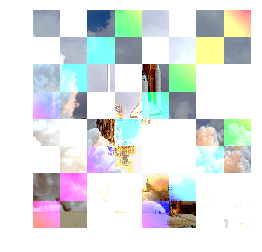

In [79]:
def linearDodge(top, bottom):
    result = top + bottom
    return np.clip(result, 0, 1)

showImage(linearDodge(top, bottom))

## Overlay

The overlay blend mode lightens the output if the bottom layer is light (>= 0.5) and darkens when the bottom layer is dark (< 0.5).

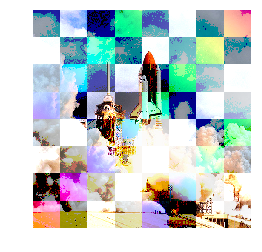

In [80]:
def overlay(top, bottom):
    return np.where(bottom < 0.5, 2 * top * bottom, 1 - (1 - top) * (1 - bottom) )

showImage(overlay(top, bottom))

## Soft light

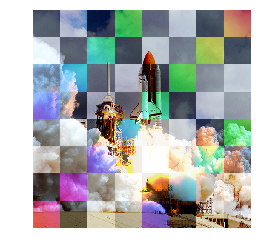

In [81]:
def softLight(top, bottom):
    return (1 - 2 * top) * pow(bottom, 2) + 2 * top * bottom

showImage(softLight(top, bottom))

## Hard light

The hard light blend mode works similarly to the **overlay** blend mode, looking at the top layer to decide whether to darken or lighten. It lightens the output if the top layer is lighter and darkens when the top layer is dark.

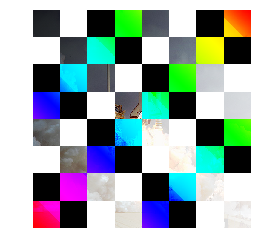

In [82]:
def hardLight(top, bottom):
    return np.where(top < 0.5, 2 * top * bottom, 1 - (1 - top) * (1 - bottom) )

showImage(hardLight(top, bottom))

## Difference

Take the absolute difference of the two images

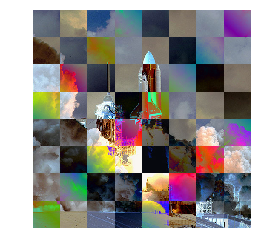

In [83]:
def difference(top, bottom):
    return abs(top - bottom)

showImage(difference(top, bottom))

## Subtract

Take the difference of the two images mapping values below zero to black.

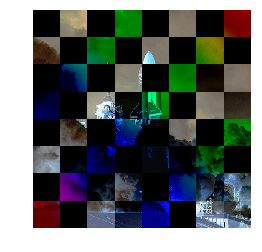

In [85]:
def subtract(top, bottom):
    result = top - bottom
    return np.clip(result, 0, 1)

showImage(subtract(top, bottom))